<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/GEOL557_Shared_Lunar_DEM_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hunter Danque, Britt Adkins, Deniz Donmez
Lunar Data DEM load
November 6, 2020

1. Load in a data file from your research or independent project? Does it require a package (like lasio or obspy)? After you have loaded it in, can you make it into a pandas dataframe easily? If not, why?

In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [ ]:
pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 1.2MB/s 
     |████████████████████████████████| 972kB 43.9MB/s 
     |████████████████████████████████| 6.5MB 33.7MB/s 
     |████████████████████████████████| 14.8MB 256kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=fc2e5067b39713568545408716e4ebb3844c136a1c1e8f129fb597d1577fffc3
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [ ]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio

ModuleNotFoundError: ignored

In [ ]:
#%cd /content/gdrive/My Drive/Colab/ #path to folder with the data on My Drive
#%cd /content/gdrive/Shared\ drives/GEOL557_Group_Project/data #/content/gdrive/Shared\ drives/GEOL557_Group_Project/data path to folder with the data on Shared drive

[Errno 2] No such file or directory: '/content/gdrive/Shared drives/GEOL557_Group_Project/data #/content/gdrive/Shared drives/GEOL557_Group_Project/data path to folder with the data on Shared drive'
/content


In [ ]:
%pwd

'/content'

In [ ]:
%ls #verify the files

gdrive/  sample_data/


In [ ]:
with rio.open('SPoleDEM10mCb.tif') as spDEM10m:
      spDEM10m_np= spDEM10m.read(1)


In [ ]:
spDEM10m

<closed DatasetReader name='SPoleDEM10mCb.tif' mode='r'>

In [ ]:
spDEM10m_np

array([[ -836,  -837,  -838, ..., -1652, -1649, -1647],
       [ -835,  -836,  -837, ..., -1654, -1651, -1649],
       [ -834,  -835,  -835, ..., -1656, -1654, -1652],
       ...,
       [ -926,  -925,  -925, ..., -3920, -3920, -3921],
       [ -925,  -925,  -925, ..., -3921, -3922, -3922],
       [ -924,  -924,  -924, ..., -3923, -3923, -3924]], dtype=int16)

In [ ]:
df_spDEM10m = pd.DataFrame(data=spDEM10m_np) #Numpy array to Pandas dataframe

In [ ]:
df_spDEM10m.iloc[0:5, 0:10] 

,0,1,2,3,4,5,6,7,8,9
0,-836,-837,-838,-839,-840,-841,-842,-843,-845,-846
1,-835,-836,-837,-838,-839,-840,-841,-842,-843,-844
2,-834,-835,-835,-837,-838,-839,-840,-841,-842,-843
3,-833,-833,-834,-835,-836,-838,-839,-840,-841,-842
4,-832,-833,-833,-834,-835,-837,-838,-839,-840,-841


In [ ]:
df_spDEM10m.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Columns: 6649 entries, 0 to 6648
dtypes: int16(6649)
memory usage: 54.7 MB


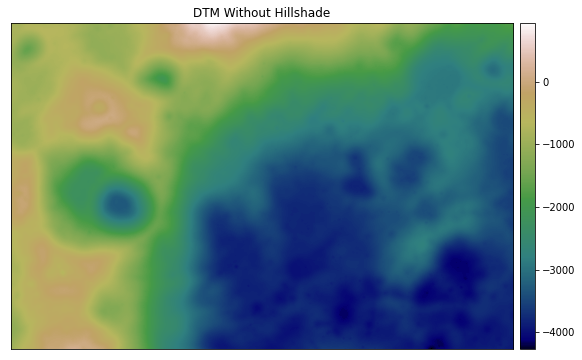

NameError: ignored

In [ ]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_spDEM10m,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

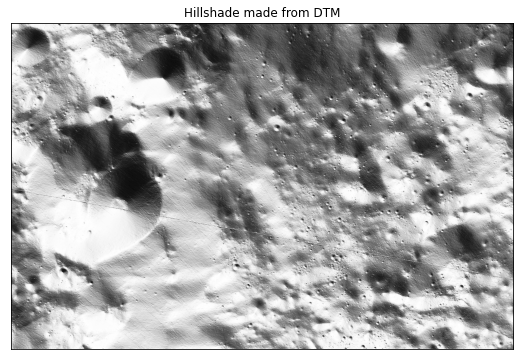

NameError: ignored

In [ ]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM10m)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()